<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

**<h1>Capstone</h1>**

**<h1>SpaceX Falcon 9 First Stage Landing Prediction</h1>**

# **Exploratory Data Analysis**

## <h2><u>Steps</u></h2>

### 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the SpaceX Dataset into the Database

In [ ]:
# Load the SpaceX dataset into a pandas DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

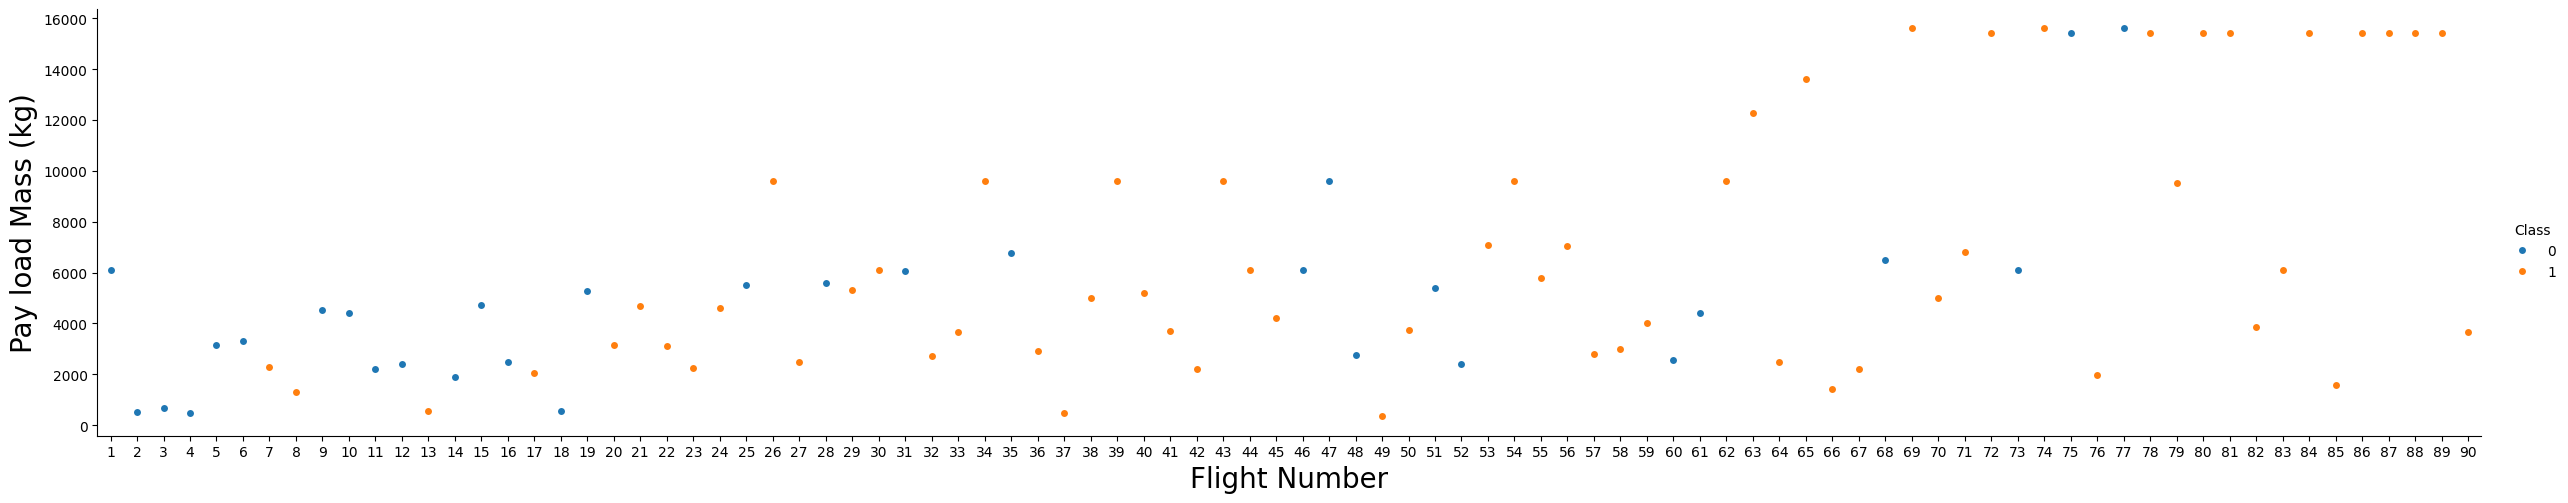

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

## <h2><u>Tasks</u></h2>

### 1. Visualize the relationship between Flight Number and Launch Site.

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>.

<Figure size 1000x600 with 0 Axes>

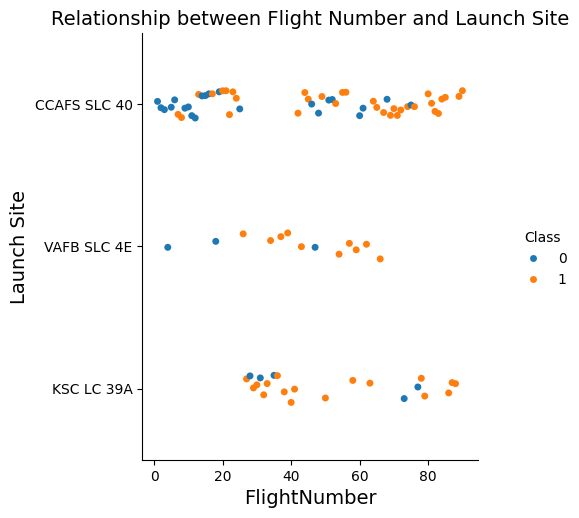

In [ ]:
## Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)

# Add plot title and labels
plt.title('Relationship between Flight Number and Launch Site', fontsize=14)
plt.xlabel('FlightNumber', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)

# Display the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots:

* The scatter plot suggests that SpaceX has increased launch frequency at CCAFS SLC-40 and KSC LC-39A over time while improving its landing success rates. Earlier failures gradually gave way to consistent success as SpaceX refined its technology and processes.

### 2. Visualize the relationship between Payload Mass and Launch Site.

We also want to observe if there is any relationship between launch sites and their payload mass.

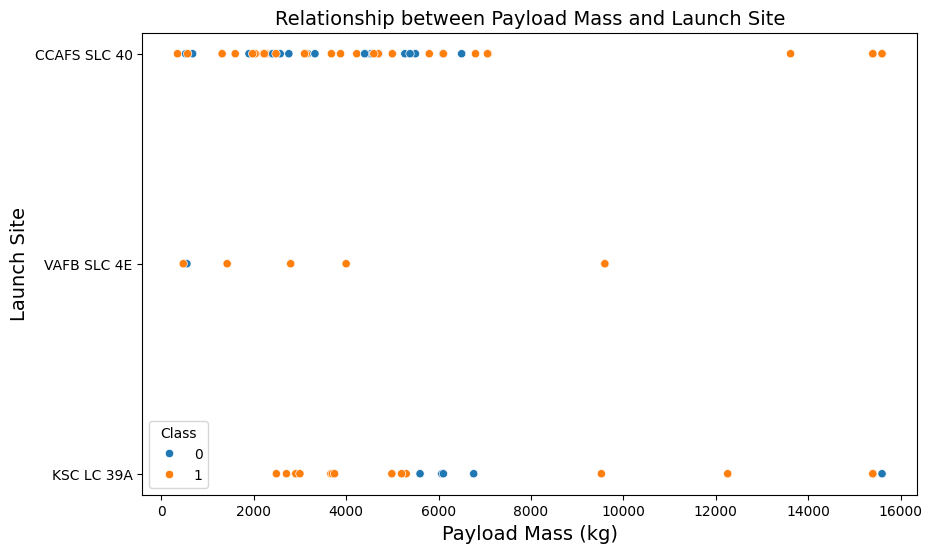

In [ ]:
## # Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)

# Add plot title and labels
plt.title('Relationship between Payload Mass and Launch Site', fontsize=14)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)

# Display the plot
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

### 3. Visualize the relationship between Success Rate of each Orbit Type.

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit.

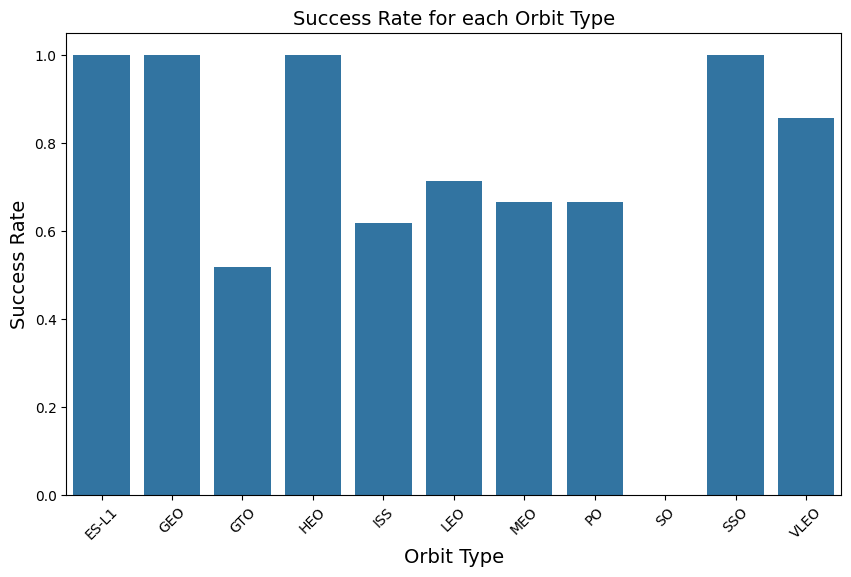

In [ ]:
## HINT use groupby method on Orbit column and get the mean of Class column

# Calculate the success rate for each orbit type using groupby and mean
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar plot to visualize the success rate of each orbit
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)

# Add labels and title
plt.title('Success Rate for each Orbit Type', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest <u>Success Rates</u>

(

The success rates in this analysis are based on the Class column, which typically represents the LANDING success for the Falcon 9 first stage.

So, in this case, the bar chart is showing the success rates for landing associated with each orbit type. Specifically, the Class column has values of:

* Class = 1: The landing was successful.
* Class = 0: The landing was unsuccessful.

).

<h3>Insights:</h3>

* Orbits like LEO and GTO may have the highest success rates, indicating that SpaceX has optimized landing procedures for missions to these orbits.
* More specialized orbits like Polar Orbit or SSO might have lower success rates, suggesting that landing after these types of missions is more challenging, possibly due to trajectory complexity or mission-specific factors.

### 4. Visualize the relationship between FlightNumber and Orbit type.

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

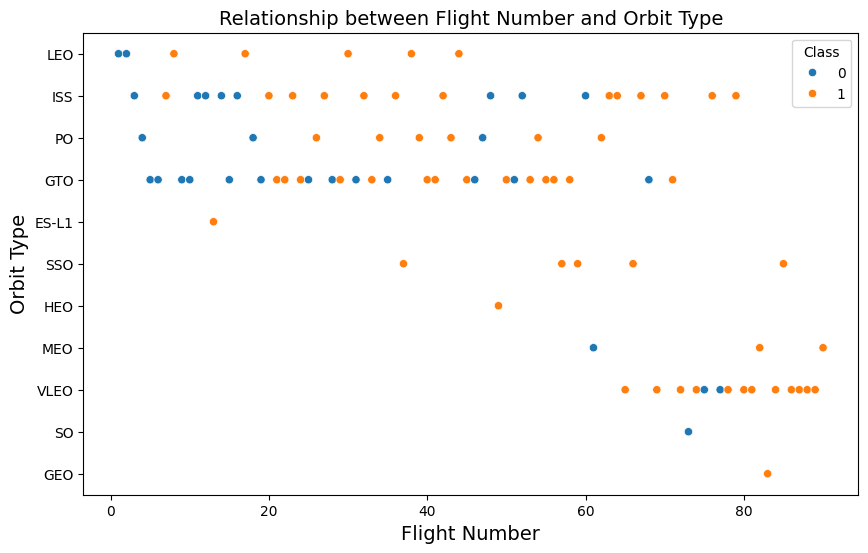

In [ ]:
## Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Create a scatter plot using seaborn's scatterplot function
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)

# Add labels and title
plt.title('Relationship between Flight Number and Orbit Type', fontsize=14)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)

# Display the plot
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

### 5. Visualize the relationship between Payload Mass and Orbit type.

Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type.

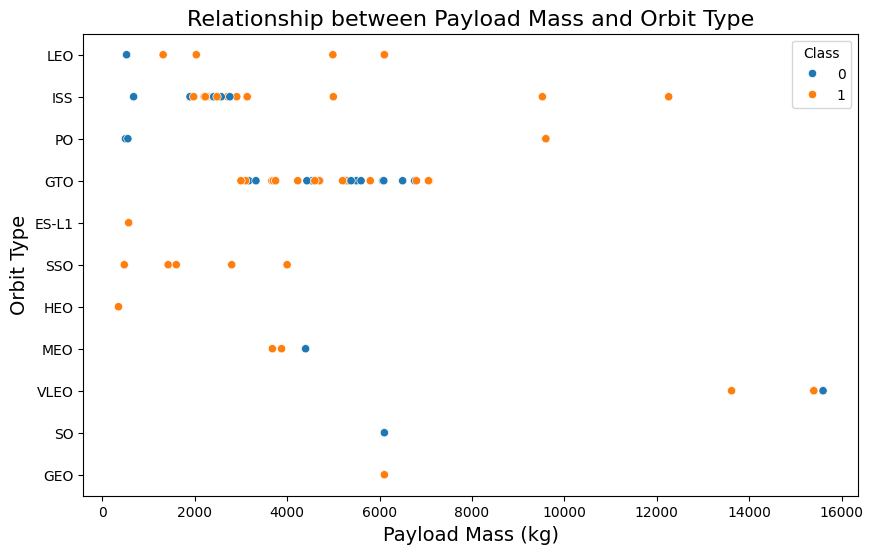

In [ ]:
## Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

# Create a scatter plot using seaborn's scatterplot function
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)

# Add labels and title
plt.title('Relationship between Payload Mass and Orbit Type', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)

# Display the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

### 6. Visualize the launch success yearly trend.

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [ ]:
# Function to Extract Years from the Date
year = []
def Extract_year(df):
    year = df["Date"].apply(lambda x: x.split("-")[0] if pd.notnull(x) else None)
    return year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Apply the function and add a new column 'Year'
df['Year'] = Extract_year(df)

In [ ]:
# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

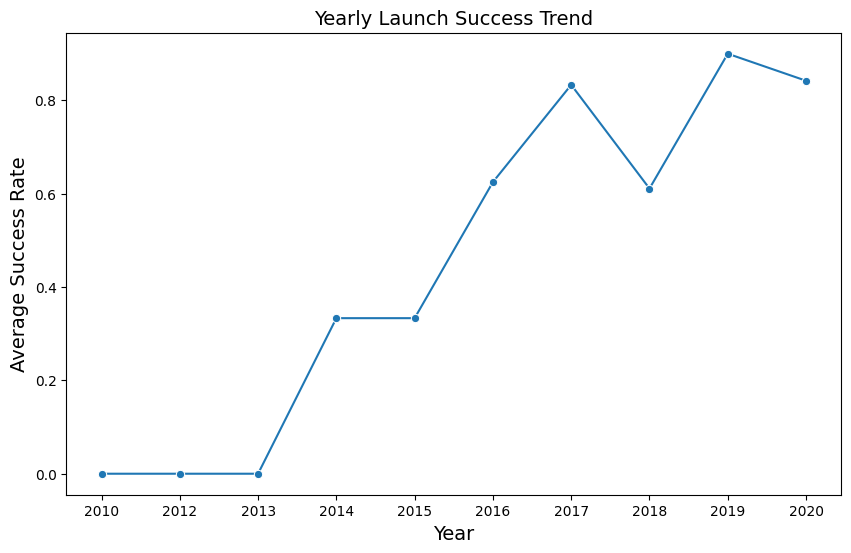

In [ ]:
## Plot a line chart with x axis to be the extracted year and y axis to be the success rate

# Plot a line chart showing the success rate by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o')

# Add labels and title
plt.title('Yearly Launch Success Trend', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)

# Display the plot
plt.show()

You can observe that the sucess rate since 2013 kept increasing till 2020.

# **Features Engineering**

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [ ]:
# Select the Required Features for Encoding
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

In [ ]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7. Create dummy variables to categorical columns.

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [ ]:
## HINT: Use get_dummies() function on the categorical columns

# Apply One-Hot Encoding using get_dummies() to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### 8. Cast all numeric columns to `float64`.

Now that our `features_one_hot` dataframe only contains numbers, cast the entire dataframe to variable type `float64`.

In [ ]:
## HINT: use astype function

# Cast all numeric columns in features_one_hot to float64
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to verify the data type conversion
features_one_hot.dtypes.head()  # Display the data types of the first few columns to verify

,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64


We can now export it to a <b>CSV</b> for the next section, but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Download the file
files.download('dataset_part_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>